In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
from datetime import datetime
import calendar
from math import sin, cos, sqrt, atan2, radians,asin

from datetime import timedelta
import datetime as dt
warnings.filterwarnings('ignore')
pd.set_option('display.max_colwidth', -1)
plt.style.use('fivethirtyeight')
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from xgboost import plot_tree
import graphviz 
import operator
import pickle
import os

In [7]:
filename='nyc_data_clean_and_features_rev2.csv'
data=pd.read_csv(filename)

In [8]:
data.head()

,passenger_count,fare_amount,dropoff_latitude_n,dropoff_longitude_n,pickup_latitude_n,pickup_longitude_n,distance,pickup_day,pickup_hour,pickup_day_of_week,pickup_month,pickup_year,is_airport,pickup_distance_jfk,dropoff_distance_jfk,pickup_distance_ewr,dropoff_distance_ewr,pickup_distance_lgr,dropoff_distance_lgr
0,1,5.5,40.754913,-74.002075,40.748764,-73.988640,1.322624,17,12,0,11,2013,0,20.425164,21.745211,17.645632,16.861508,17.645632,11.067460
1,1,5.5,40.763477,-73.977753,40.753613,-73.980888,1.128517,20,6,3,11,2013,0,20.213616,20.691607,18.449548,19.121147,18.449548,8.885643
2,1,5.5,40.757526,-73.979164,40.750877,-73.986847,0.982869,21,12,6,12,2013,0,20.437318,20.365351,17.870950,18.748058,17.870950,9.118316
3,1,5.5,40.736359,-73.988503,40.729530,-73.978096,1.160337,8,11,0,12,2013,0,18.515769,19.659780,17.869532,17.216362,17.869532,10.597714
4,1,5.5,40.780495,-73.981415,40.769955,-73.987923,1.294193,21,10,1,10,2013,0,21.811073,22.180383,18.665183,19.707963,18.665183,9.129984


In [9]:
data=data.drop(['pickup_year'],axis=1)

In [10]:
X=data.drop(['fare_amount'],axis=1)
y=data['fare_amount']

#split data into train and validation data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)

## XGBoost

In [11]:
def XGBoost(X_train,X_test,y_train,y_test,num_rounds=300):
    dtrain = xgb.DMatrix(X_train,label=y_train)
    dtest = xgb.DMatrix(X_test,label=y_test)

    return xgb.train(params={'objective':'reg:linear','eval_metric':'rmse'}
                    ,dtrain=dtrain,num_boost_round=num_rounds, 
                    early_stopping_rounds=20,evals=[(dtest,'test')],)

In [12]:
xgbm = XGBoost(X_train,X_test,y_train,y_test)
xgbm_pred = xgbm.predict(xgb.DMatrix(X_test), ntree_limit = xgbm.best_ntree_limit)

[12:27:28] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 124 extra nodes, 0 pruned nodes, max_depth=6
[0]	test-rmse:11.1686
Will train until test-rmse hasn't improved in 20 rounds.
[12:27:30] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[1]	test-rmse:8.32805
[12:27:32] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[2]	test-rmse:6.47466
[12:27:34] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[3]	test-rmse:5.32773
[12:27:36] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[4]	test-rmse:4.64179
[12:27:39] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.

[46]	test-rmse:3.61068
[12:29:40] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 94 extra nodes, 0 pruned nodes, max_depth=6
[47]	test-rmse:3.6094
[12:29:43] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 120 extra nodes, 0 pruned nodes, max_depth=6
[48]	test-rmse:3.60601
[12:29:46] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 100 extra nodes, 0 pruned nodes, max_depth=6
[49]	test-rmse:3.60436
[12:29:49] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 118 extra nodes, 0 pruned nodes, max_depth=6
[50]	test-rmse:3.60246
[12:29:53] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 122 extra nodes, 0 pruned nodes, max_depth=6
[51]	test-rmse:3.60073
[12:29:56] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 root

[93]	test-rmse:3.57676
[12:31:48] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 120 extra nodes, 0 pruned nodes, max_depth=6
[94]	test-rmse:3.57686
[12:31:51] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 0 pruned nodes, max_depth=6
[95]	test-rmse:3.57673
[12:31:54] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 106 extra nodes, 0 pruned nodes, max_depth=6
[96]	test-rmse:3.57586
[12:31:58] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 82 extra nodes, 0 pruned nodes, max_depth=6
[97]	test-rmse:3.57599
[12:32:01] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 120 extra nodes, 0 pruned nodes, max_depth=6
[98]	test-rmse:3.57297
[12:32:04] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 root

[140]	test-rmse:3.55663
[12:33:53] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 68 extra nodes, 0 pruned nodes, max_depth=6
[141]	test-rmse:3.55666
[12:33:56] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 68 extra nodes, 0 pruned nodes, max_depth=6
[142]	test-rmse:3.5569
[12:33:59] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 100 extra nodes, 0 pruned nodes, max_depth=6
[143]	test-rmse:3.55691
[12:34:02] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 92 extra nodes, 0 pruned nodes, max_depth=6
[144]	test-rmse:3.55718
[12:34:05] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 88 extra nodes, 0 pruned nodes, max_depth=6
[145]	test-rmse:3.55751
[12:34:08] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 r

[187]	test-rmse:3.54829
[12:36:03] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 124 extra nodes, 0 pruned nodes, max_depth=6
[188]	test-rmse:3.54816
[12:36:06] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 52 extra nodes, 0 pruned nodes, max_depth=6
[189]	test-rmse:3.54826
[12:36:10] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 108 extra nodes, 0 pruned nodes, max_depth=6
[190]	test-rmse:3.54804
[12:36:13] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 100 extra nodes, 0 pruned nodes, max_depth=6
[191]	test-rmse:3.54857
[12:36:17] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 0 pruned nodes, max_depth=6
[192]	test-rmse:3.54887
[12:36:20] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 

Text(0.5,1,'Feature Importance')

<Figure size 432x288 with 0 Axes>

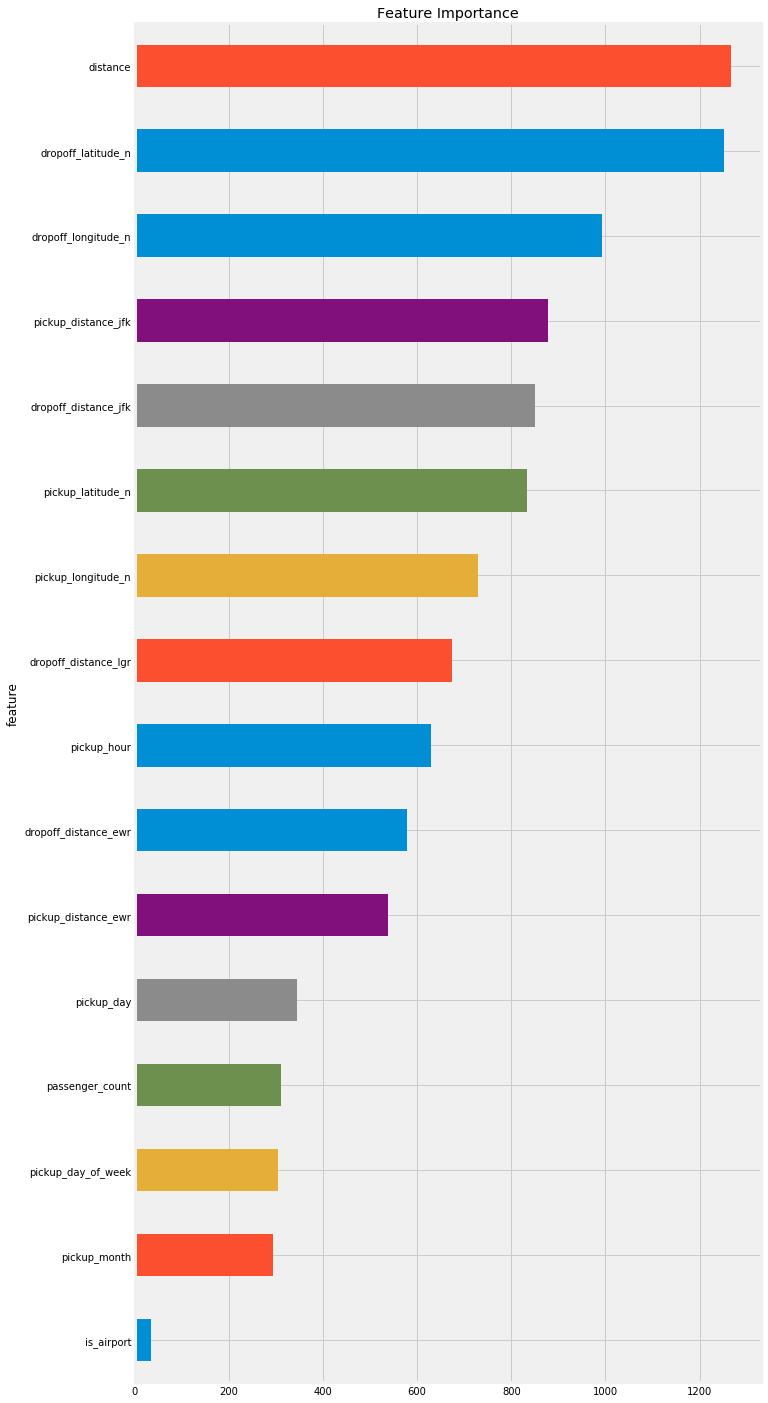

In [13]:
importance=xgbm.get_score()
importance = sorted(importance.items(), key=operator.itemgetter(1))
df_importance = pd.DataFrame(importance, columns=['feature', 'score'])
plt.figure()

df_importance.plot(kind='barh', x='feature', y='score', legend=False, figsize=(10, 25))
plt.title("Feature Importance")

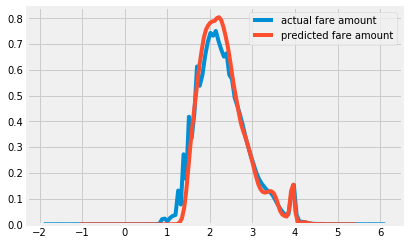

In [14]:
sns.kdeplot(np.log(y_test),label='actual fare amount')
sns.kdeplot(np.log(xgbm_pred),label='predicted fare amount')

## XGBoost with less features

In [15]:
less=data

In [16]:
def encodeWeekend(day_of_week):
    day_dict={0:1,1:0,2:0,3:0,4:0,5:0,6:1}
    return day_dict[day_of_week]

In [17]:
less['is_weekend']= less['pickup_day_of_week'].apply(lambda x:encodeWeekend(x))

In [18]:
# remove some of the date parameters
less=less.drop(['pickup_day',
           'pickup_day_of_week'],axis=1)

In [19]:
X2=less.drop(['fare_amount'],axis=1)
y2=less['fare_amount']

#split data into train and validation data
X2_train, X2_test, y2_train, y2_test = train_test_split(X2,y2, test_size=0.3)

In [20]:
xgbm2 = XGBoost(X2_train,X2_test,y2_train,y2_test)
xgbm_pred2 = xgbm2.predict(xgb.DMatrix(X2_test), ntree_limit = xgbm2.best_ntree_limit)

[12:43:18] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 124 extra nodes, 0 pruned nodes, max_depth=6
[0]	test-rmse:11.1465
Will train until test-rmse hasn't improved in 20 rounds.
[12:43:20] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 124 extra nodes, 0 pruned nodes, max_depth=6
[1]	test-rmse:8.31824
[12:43:23] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[2]	test-rmse:6.48085
[12:43:26] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[3]	test-rmse:5.34369
[12:43:30] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 124 extra nodes, 0 pruned nodes, max_depth=6
[4]	test-rmse:4.66641
[12:43:33] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.

[46]	test-rmse:3.6193
[12:45:55] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 80 extra nodes, 0 pruned nodes, max_depth=6
[47]	test-rmse:3.61853
[12:45:58] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 90 extra nodes, 0 pruned nodes, max_depth=6
[48]	test-rmse:3.61816
[12:46:02] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 84 extra nodes, 0 pruned nodes, max_depth=6
[49]	test-rmse:3.61702
[12:46:08] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 112 extra nodes, 0 pruned nodes, max_depth=6
[50]	test-rmse:3.61526
[12:46:13] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 106 extra nodes, 0 pruned nodes, max_depth=6
[51]	test-rmse:3.61194
[12:46:17] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots,

[93]	test-rmse:3.57935
[12:48:24] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 68 extra nodes, 0 pruned nodes, max_depth=6
[94]	test-rmse:3.57945
[12:48:26] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 70 extra nodes, 0 pruned nodes, max_depth=6
[95]	test-rmse:3.57934
[12:48:28] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 0 pruned nodes, max_depth=6
[96]	test-rmse:3.57945
[12:48:32] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[97]	test-rmse:3.57831
[12:48:36] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 118 extra nodes, 0 pruned nodes, max_depth=6
[98]	test-rmse:3.57815
[12:48:39] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots

[140]	test-rmse:3.56852
[12:50:41] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 114 extra nodes, 0 pruned nodes, max_depth=6
[141]	test-rmse:3.56804
[12:50:43] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 120 extra nodes, 0 pruned nodes, max_depth=6
[142]	test-rmse:3.56731
[12:50:45] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 70 extra nodes, 0 pruned nodes, max_depth=6
[143]	test-rmse:3.56764
[12:50:48] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 116 extra nodes, 0 pruned nodes, max_depth=6
[144]	test-rmse:3.56754
[12:50:50] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 102 extra nodes, 0 pruned nodes, max_depth=6
[145]	test-rmse:3.56698
[12:50:52] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end,

[187]	test-rmse:3.56333
[12:52:55] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 78 extra nodes, 0 pruned nodes, max_depth=6
[188]	test-rmse:3.56315
[12:52:57] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 110 extra nodes, 0 pruned nodes, max_depth=6
[189]	test-rmse:3.56281
[12:52:59] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=6
[190]	test-rmse:3.56303
[12:53:02] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 86 extra nodes, 0 pruned nodes, max_depth=6
[191]	test-rmse:3.56343
[12:53:05] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 110 extra nodes, 0 pruned nodes, max_depth=6
[192]	test-rmse:3.56266
[12:53:07] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1

ValueError: feature_names mismatch: ['passenger_count', 'dropoff_latitude_n', 'dropoff_longitude_n', 'pickup_latitude_n', 'pickup_longitude_n', 'distance', 'pickup_day', 'pickup_hour', 'pickup_day_of_week', 'pickup_month', 'is_airport', 'pickup_distance_jfk', 'dropoff_distance_jfk', 'pickup_distance_ewr', 'dropoff_distance_ewr', 'pickup_distance_lgr', 'dropoff_distance_lgr'] ['passenger_count', 'dropoff_latitude_n', 'dropoff_longitude_n', 'pickup_latitude_n', 'pickup_longitude_n', 'distance', 'pickup_hour', 'pickup_month', 'is_airport', 'pickup_distance_jfk', 'dropoff_distance_jfk', 'pickup_distance_ewr', 'dropoff_distance_ewr', 'pickup_distance_lgr', 'dropoff_distance_lgr', 'is_weekend']
expected pickup_day, pickup_day_of_week in input data
training data did not have the following fields: is_weekend

Text(0.5,1,'Feature Importance')

<Figure size 432x288 with 0 Axes>

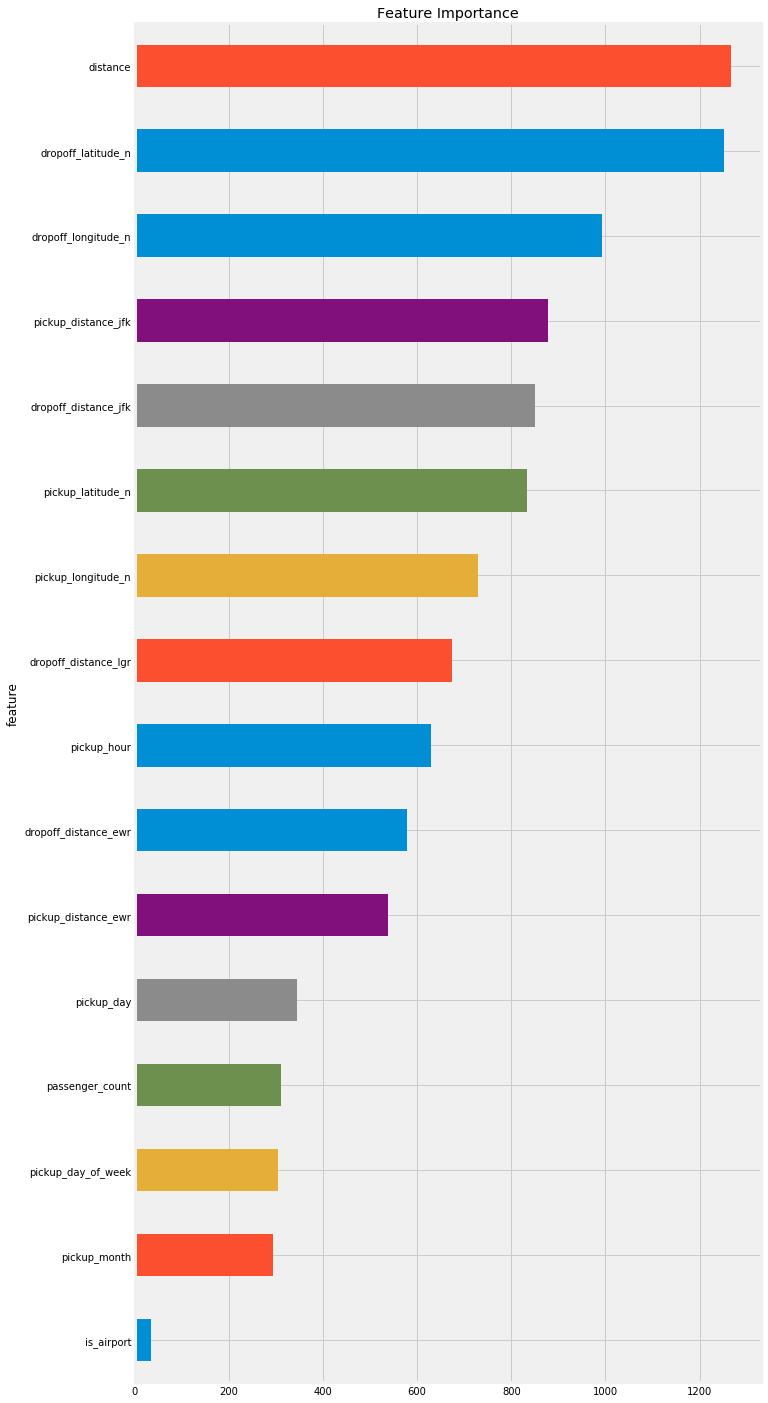

In [22]:
importance=xgbm.get_score()
importance = sorted(importance.items(), key=operator.itemgetter(1))
df_importance = pd.DataFrame(importance, columns=['feature', 'score'])
plt.figure()

df_importance.plot(kind='barh', x='feature', y='score', legend=False, figsize=(10, 25))
plt.title("Feature Importance")

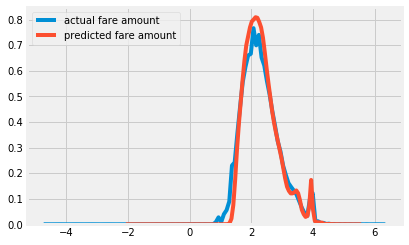

In [24]:
sns.kdeplot(np.log(y2_test),label='actual fare amount')
sns.kdeplot(np.log(xgbm_pred2),label='predicted fare amount')

In [29]:
import graphviz 

ExecutableNotFound: failed to execute ['dot', '-Tpng'], make sure the Graphviz executables are on your systems' PATH

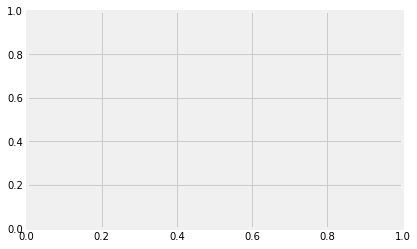

In [33]:

plot_tree(xgbm2)
plt.show()

In [31]:
# save the model to disk
modelname = 'XGBoost_model_rev2.sav'
pickle.dump(xgbm2, open(modelname, 'wb'))